## Bispectrum Tutorial

This tutorial is intended to demonstrate bispectrum Analysis on Lightcurve data.<br>

The Bispectrum is an example of a Higher Order Spectrum (HOS) and contains more information that simple Powerspectrum or non-ploy spectra. <br> For detailed information on Bispectra visit : https://arxiv.org/pdf/1308.3150

In Stingray, Bispectrum can be created from a Lightcurve(For more information on Lightcurve, visit Lightcurve Notebook).<br>

First we import relevant classes.

In [2]:
from stingray import lightcurve
import numpy as np
from stingray.bispectrum import Bispectrum

import matplotlib.pyplot as plt
%matplotlib inline

Lightcurve Object can be created from an array of time stamps and an array of counts. Creating a simple lightcurve to demonstrate Bispectrum.

In [3]:
times = np.arange(1,11)
counts = np.array([2, 1, 3, 4, 2, 5, 1, 0, 2, 3])
lc = lightcurve.Lightcurve(times,counts)

lc.counts

array([2, 1, 3, 4, 2, 5, 1, 0, 2, 3])

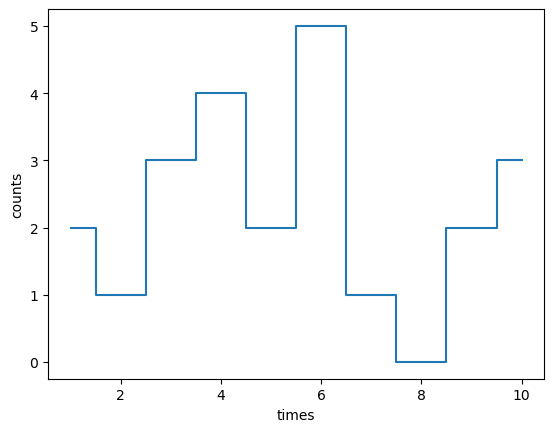

In [4]:
lc.plot(labels=['times','counts'])
plt.show()

A `Bispectrum` Object takes 4 parameter.<br>

1. `lc` : The light curve (lc).
2. `maxlag` : Maximum lag on both positive and negative sides of 3rd order cumulant (Similar to lags in correlation).
3. `window` : Specifies the type of window to apply as as string
4. `scale` : 'biased' or 'unbiased' for normalization

Arguments 2 and 3 are optional. If `maxlag` is not specified, it is set to no. of observations in lightcurve divided by 2. i.e `lc.n/2` .

In [5]:
bs = Bispectrum(lc)

Different attribute values can be observed by calling relevant properties. Most common are:<br>
1. self.freq - Frequencies against which Bispectrum is calculated.
2. self.lags - Time lags in lightcurve against which 3rd order cumulant is calculated.
3. self.cum3 - 3rd Order cumulant function
4. self.bispec_mag - Magnitude of Bispectrum
5. self.bispecphase - Phase of Bispectrum

In [6]:
bs.freq

array([-0.5, -0.4, -0.3, -0.2, -0.1,  0. ,  0.1,  0.2,  0.3,  0.4,  0.5])

In [7]:
bs.lags

array([-5., -4., -3., -2., -1.,  0.,  1.,  2.,  3.,  4.,  5.])

In [8]:
bs.cum3

array([[-0.3885, -0.0915,  0.1685, -0.5085,  0.8135, -0.0675, -0.2708,
         0.0229,  0.1426, -0.0567,  0.    ],
       [-0.0915,  0.2328, -0.5162, -2.0652,  0.3058,  0.1968,  0.8135,
         0.5492,  0.0209, -0.2484,  0.0063],
       [ 0.1685, -0.5162, -0.3999,  0.9821, -0.4989,  0.5011,  0.3058,
        -0.5085, -0.2348,  0.2379,  0.0426],
       [-0.5085, -2.0652,  0.9821, -0.3096,  0.5704,  2.1084, -0.4989,
        -2.0652,  0.1685,  0.8632,  0.0999],
       [ 0.8135,  0.3058, -0.4989,  0.5704, -1.3613, -0.3823,  0.5704,
         0.9821, -0.5162, -0.0915,  0.0872],
       [-0.0675,  0.1968,  0.5011,  2.1084, -0.3823,  0.864 , -1.3613,
        -0.3096, -0.3999,  0.2328, -0.3885],
       [-0.2708,  0.8135,  0.3058, -0.4989,  0.5704, -1.3613, -0.3823,
         0.5704,  0.9821, -0.5162, -0.0915],
       [ 0.0229,  0.5492, -0.5085, -2.0652,  0.9821, -0.3096,  0.5704,
         2.1084, -0.4989, -2.0652,  0.1685],
       [ 0.1426,  0.0209, -0.2348,  0.1685, -0.5162, -0.3999,  0.9821,
 

In [9]:
bs.bispec_mag

array([[  6.1870122 ,   9.78649295,   6.29941723,   8.10990858,
          3.90975859,   1.49707597,  10.53408125,   8.44275685,
          7.73419771,   7.91909148,   3.40576093],
       [  9.78649295,  12.99063169,  11.9523207 ,  12.31681   ,
          7.34404789,   1.93438197,   5.05536311,  15.92827099,
          6.61153784,   3.09535492,   7.91909148],
       [  6.29941723,  11.9523207 ,   4.84009298,   8.98535468,
          5.6746004 ,   1.71227576,   9.35566037,  12.00797853,
          1.60576409,   6.61153784,   7.73419771],
       [  8.10990858,  12.31681   ,   8.98535468,  18.69373893,
          9.83780286,   2.72630968,   7.87985137,   5.32007463,
         12.00797853,  15.92827099,   8.44275685],
       [  3.90975859,   7.34404789,   5.6746004 ,   9.83780286,
          5.93123174,   1.60598497,   0.51743271,   7.87985137,
          9.35566037,   5.05536311,  10.53408125],
       [  1.49707597,   1.93438197,   1.71227576,   2.72630968,
          1.60598497,   1.262     ,   1.6

In [10]:
bs.bispec_phase

array([[ -7.65814471e-01,  -8.39758950e-01,   7.49083269e-01,
         -9.35797260e-01,  -1.22623935e+00,  -3.13514588e+00,
          4.35308043e-01,   6.65460441e-01,   6.17269495e-01,
          4.39881603e-01,  -3.14159265e+00],
       [ -8.39758950e-01,   1.84719564e+00,   1.70902436e+00,
         -6.50042861e-01,  -5.76818268e-01,  -9.16177187e-02,
          1.76512372e+00,   2.97853199e+00,   1.45401552e+00,
          0.00000000e+00,  -4.39881603e-01],
       [  7.49083269e-01,   1.70902436e+00,   1.64851065e+00,
         -5.51373516e-01,  -1.32816666e+00,   2.45429375e-01,
          2.86246989e+00,   3.08272440e+00,  -1.10623774e-15,
         -1.45401552e+00,  -6.17269495e-01],
       [ -9.35797260e-01,  -6.50042861e-01,  -5.51373516e-01,
         -2.97776986e+00,  -2.96295975e+00,  -4.83162811e-01,
          1.34000660e+00,   0.00000000e+00,  -3.08272440e+00,
         -2.97853199e+00,  -6.65460441e-01],
       [ -1.22623935e+00,  -5.76818268e-01,  -1.32816666e+00,
         -2.96

## Plots

Bispectrum in stingray also provides functionality for contour plots of:<br>

1. 3rd Order Cumulant function
2. Magnitude Bispectrum
3. Phase Bispectrum

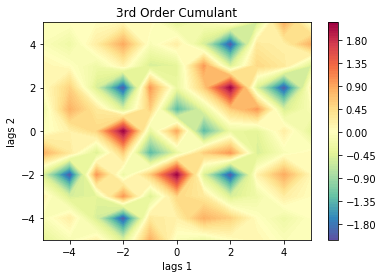

In [11]:
p = bs.plot_cum3()
p.show()

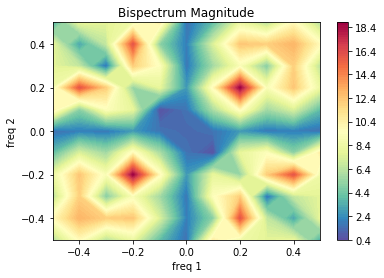

In [12]:
p = bs.plot_mag()
p.show()

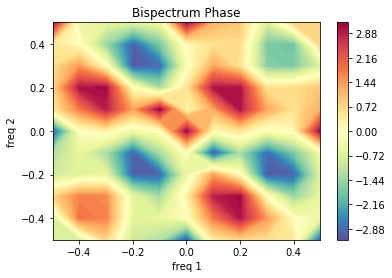

In [13]:
p = bs.plot_phase()
p.show()

## Another Example

Another example is demostrated here for a periodic lighturve with poisson noise.

In [14]:
dt = 0.0001  # seconds
freq = 1 #Hz
exposure = 50.  # seconds
times = np.arange(0, exposure, dt)  # seconds

signal = 300 * np.sin(2.*np.pi*freq*times/0.5) + 1000  # counts/s
noisy = np.random.poisson(signal*dt)  # counts

lc = lightcurve.Lightcurve(times,noisy)

In [15]:
lc.n

500000

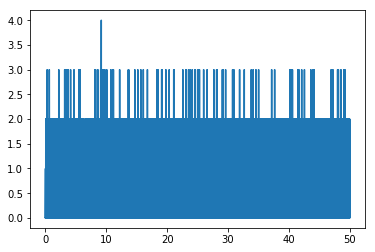

In [16]:
lc.plot()

In this example, 'unbiased' scaled Bispectrum is calculated.

In [17]:
bs = Bispectrum(lc, maxlag=25, scale='unbiased')

In [18]:
bs.freq[:5]

array([-5000.00000001, -4800.00000001, -4600.00000001, -4400.00000001,
       -4200.00000001])

In [19]:
bs.lags[-5:]

array([ 0.0021,  0.0022,  0.0023,  0.0024,  0.0025])

In [20]:
bs.n

500000

In [21]:
bs.cum3[0]

array([  4.16469688e-04,  -1.15175317e-06,  -1.07527932e-05,
         3.12465067e-05,  -1.49891250e-05,  -1.13491830e-05,
        -3.01378025e-05,   8.84909091e-06,  -9.76499980e-06,
        -4.03093430e-05,  -1.39169834e-05,  -1.06733571e-05,
        -3.56900080e-05,  -4.36904080e-05,  -1.64739272e-05,
        -6.07642325e-06,  -9.40724231e-05,   3.20972054e-05,
         1.10825598e-06,   1.57445478e-05,   1.50738698e-04,
        -1.53088049e-05,  -1.06758132e-05,  -8.50761732e-05,
        -2.70732731e-05,   5.15575763e-04,  -2.26276548e-06,
        -5.46966498e-05,  -3.49049233e-05,   6.93111630e-05,
        -1.96629892e-05,  -4.00897434e-05,  -5.37940654e-07,
        -1.25908665e-04,  -4.04722751e-05,  -1.95122973e-05,
         7.48985545e-06,  -1.59418559e-05,  -3.40950546e-07,
        -5.28946188e-05,  -6.77547458e-05,  -2.58282563e-06,
        -2.16597857e-05,   2.08264564e-05,   1.62145798e-05,
         6.20770115e-05,   5.74011370e-05,   3.04301082e-05,
         5.42455829e-05,

In [22]:
bs.bispec_mag[1]

array([ 0.10270301,  0.09674684,  0.1026435 ,  0.10278492,  0.09607422,
        0.09961388,  0.10090391,  0.10316149,  0.09881147,  0.10027435,
        0.09052907,  0.10086312,  0.09964639,  0.09224589,  0.10189853,
        0.09783874,  0.1029246 ,  0.10003251,  0.1003841 ,  0.09654483,
        0.10021589,  0.10265071,  0.09913028,  0.10406698,  0.10248613,
        0.12079938,  0.10038381,  0.09376602,  0.09916139,  0.10218425,
        0.09798569,  0.10296954,  0.10377357,  0.10144925,  0.09848511,
        0.09731673,  0.10031293,  0.09733791,  0.10085873,  0.09769191,
        0.10021328,  0.1000008 ,  0.10362033,  0.10352851,  0.09763424,
        0.10249754,  0.09752426,  0.09520164,  0.09959243,  0.12395456,
        0.10188173])

In [23]:
bs.bispec_phase[1]

array([ -1.44942123e-02,   1.67988284e-02,  -3.06544878e-03,
         1.24304742e-02,  -4.69267453e-04,   1.80410887e-02,
         1.18875941e-03,  -1.85154750e-03,   2.17338081e-02,
         1.03821918e-02,  -7.09489717e-03,   1.05358508e-02,
         4.01625879e-03,  -2.05403388e-02,   1.17686452e-03,
         2.56746832e-02,   2.17353559e-02,  -7.69020683e-03,
         1.54447950e-02,  -9.03814639e-04,   3.43660863e-03,
        -5.37971533e-04,   9.42017522e-03,   1.42720920e-03,
         1.17025084e-03,  -5.00982277e-03,  -1.53439701e-02,
        -7.63874625e-04,  -4.10637611e-02,   2.41131565e-02,
        -1.95500843e-02,  -2.98681684e-02,   1.23914953e-03,
        -2.75100800e-02,  -3.88428578e-03,  -7.87537903e-03,
        -1.53613857e-03,   1.47624077e-02,  -4.86162981e-03,
        -2.76731089e-03,   9.30828311e-03,  -2.86531767e-02,
        -1.16465064e-02,  -2.30165990e-02,  -7.71187242e-03,
         2.00694116e-02,  -5.16511843e-02,  -1.98737477e-03,
        -9.87738671e-03,

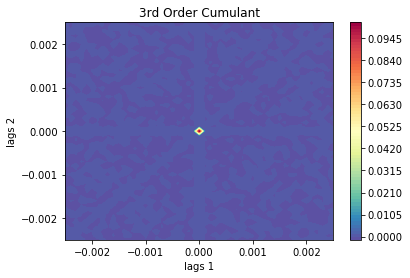

In [24]:
p = bs.plot_cum3()
p.show()

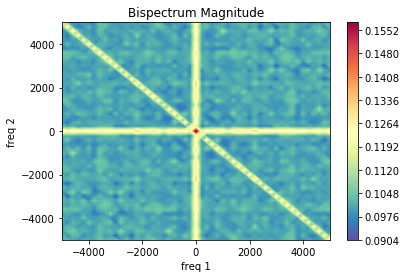

In [25]:
p = bs.plot_mag()
p.show()

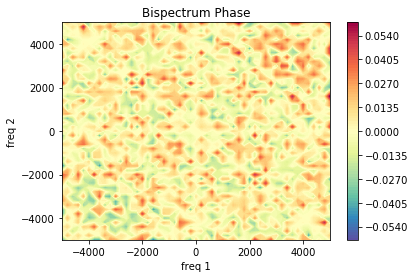

In [26]:
p = bs.plot_phase()
p.show()

## Window Functions for Bispectrum

`Bispectrum` in `Stingray` now supports 2D windows to apply before calculating `Bispectrum`. 

Windows currently available in `Stingray` include:
1. Uniform or Rectangular window
2. Parzen Window
3. Hamming Window
4. Hanning Window
5. Triangular Window
6. Blackmann's Window
7. Welch Window
8. Flat-top Window

Windows are available in `stingray.utils` package and can be used by calling `create_window` function.

Now, we demonstrate Bispectrum with windows applied. By default, now window is applied.

In [29]:
window = 'uniform'

bs = Bispectrum(lc,maxlag=25,window = window, scale ='unbiased')

In [30]:
bs.window_name

'uniform'

### Plot Window

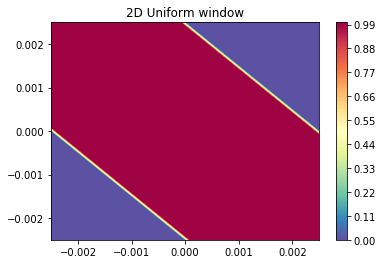

In [32]:
cont = plt.contourf(bs.lags, bs.lags, bs.window, 100, cmap=plt.cm.Spectral_r)
plt.colorbar(cont)
plt.title('2D Uniform window')

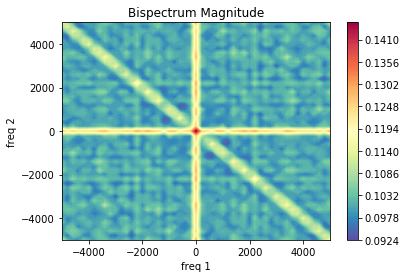

In [34]:
mag_plot = bs.plot_mag()
mag_plot.show()

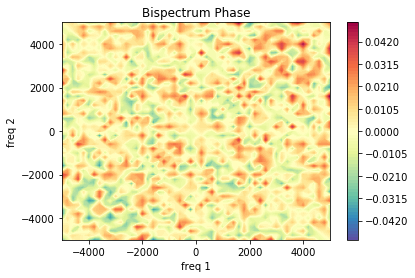

In [35]:
phase_plot = bs.plot_phase()
phase_plot.show()

Now, let us try some more window functions.

In [36]:
bs = Bispectrum(lc, maxlag=25,window = 'hamming',scale='biased')

In [37]:
bs.window_name

'hamming'

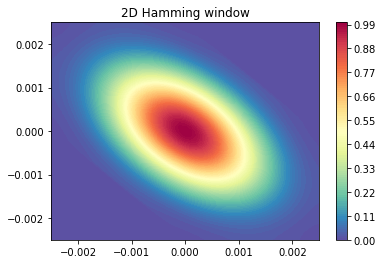

In [38]:
cont = plt.contourf(bs.lags, bs.lags, bs.window, 100, cmap=plt.cm.Spectral_r)
plt.colorbar(cont)
plt.title('2D Hamming window')

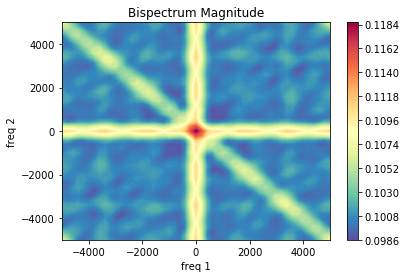

In [39]:
mag_plot = bs.plot_mag()
mag_plot.show()

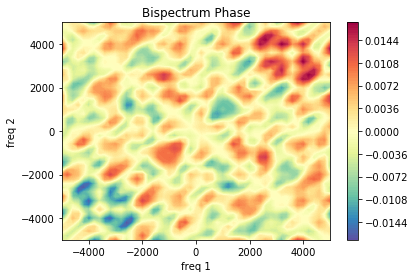

In [40]:
phase_plot = bs.plot_phase()
phase_plot.show()

### Another Window demonstrated

In [45]:
bs = Bispectrum(lc, maxlag = 25, window='triangular',scale='unbiased')

In [46]:
bs.window_name

'triangular'

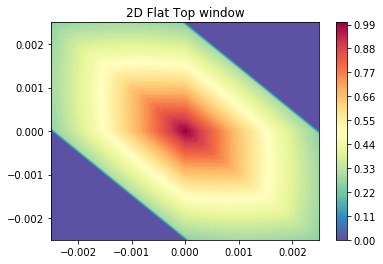

In [47]:
cont = plt.contourf(bs.lags, bs.lags, bs.window, 100, cmap=plt.cm.Spectral_r)
plt.colorbar(cont)
plt.title('2D Flat Top window')

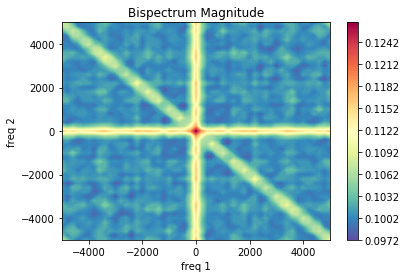

In [48]:
bs.plot_mag().show()

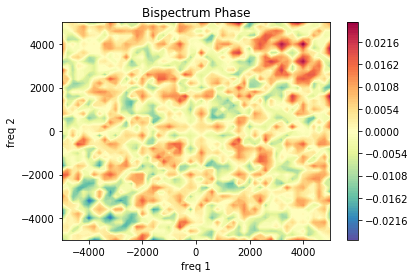

In [52]:
bs.plot_phase().show()